In [10]:
#Q1

Anant Mehta 102003556

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [12]:
df = pd.read_csv("/content/sample_data/spam.csv", encoding = "latin-1", usecols=["v1", "v2"])
df.columns = ["label", "message"]

In [13]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
non_spam_messages = df[df["label"]=="ham"]["message"] #filters non-spam (ham) messages
print(non_spam_messages)
l = [message.split() for message in non_spam_messages] #creates lists of words from each message
no_spam_words = list(itertools.chain.from_iterable(l)) #concatenates all lists of words into one
print(no_spam_words)
spam_messages = df[df["label"]=="spam"]["message"] 
print(spam_messages)
k = [message.split() for message in spam_messages]
spam_words = list(itertools.chain.from_iterable(k))
non_spam = Counter(no_spam_words) #creates dictionary with occurrences of each no_spam word
spam = Counter(spam_words) #creates dictionary occurences of each spam word (creates dictionary)
non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True) #creates list sorted descending by value (number of occurences) 
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True) 

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 4825, dtype: object
['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...', 'Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...', 'U', 'dun', 'say', 'so', 'early', 'hor...', 'U', 'c', 'already', 'then', 'say...', 'Nah', 'I', "do

In [15]:
X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_features = 300, stop_words = 'english')
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [16]:
model = MultinomialNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9447236180904522


In [17]:
y_test_pred = model.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[1168,   28],
       [  49,  148]])

In [18]:
#Q2

In [19]:
from sklearn import datasets

In [20]:
iris = datasets.load_iris()

In [21]:
X=iris.data
Y=iris.target

In [22]:
import pandas as pd
df=pd.DataFrame(X)
df
df1=pd.DataFrame(Y)
df1

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [25]:
df1[0].unique()

array([0, 1, 2])

In [26]:
x=df.copy()
y=df1.copy()
for column in x.columns:
    x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())    
x

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
len(x_train)

105

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [29]:
GaussianNB()

GaussianNB()

In [30]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9777777777777777


In [31]:
print("Naive Bayes score: ",nb.score(x_train, y_train))

Naive Bayes score:  0.9428571428571428


In [32]:
pred=nb.predict(x_test)

In [33]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
print(confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [36]:
import numpy as np
import math

In [37]:
def fit(X_train,Y_train):
    result={}
    class_values={0,1,2,3}
    #have top level keys
    for current_class in class_values:
        result[current_class]={}
        result["total_data"]=len(Y_train)
        current_class_rows=(Y_train==current_class)
        X_train_current=X_train[current_class_rows]
        Y_train_current=Y_train[current_class_rows]
        num_features=X_train.shape[1]
        result[current_class]["total_count"]=len(Y_train_current)
        for j in range(1,num_features+1):
            result[current_class][j]={}
            all_possible_values=set(X_train[:,j-1])
            for current_value in all_possible_values:
                result[current_class][j][current_value]=(X_train_current[:,j-1]==current_value).sum()
    return result

In [38]:
def probability(dictionary,x,current_class):
    #add log probs
    output=np.log(dictionary[current_class]["total_count"])-np.log(dictionary["total_data"])
    num_features=len(dictionary[current_class].keys())-1;
    for j in range(1,num_features+1):
        xj=x[j-1]
        # with laplace correction
        count_current_class_with_value_xj=dictionary[current_class][j][xj]+1
        count_current_class=dictionary[current_class]["total_count"]+len(dictionary[current_class][j].keys())
        current_xj_probability=np.log(count_current_class_with_value_xj)-np.log(count_current_class)
        output=output+current_xj_probability
    return output

In [39]:
def predictSinglePoint(dictionary,x):
    classes=dictionary.keys()
    best_p=-1000
    best_class=-1
    for current_class in classes:
        if(current_class=="total_data"):
            continue
        p_current_class=probability(dictionary,x,current_class)
        if(p_current_class>best_p):
            best_p=p_current_class
            best_class=current_class
    return best_class

In [40]:
def predict(dictionary,X_test):
    y_pred=[]
    for x in X_test:
        x_class=predictSinglePoint(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [41]:
def makeLabelled(column):
    s=column.mean()
    f=0.5*s
    t=1.5*s
    for i in range(0,len(column)):
        if(column[i]<f):
            column[i]=0
        elif(column[i]<s):
            column[i]=1
        elif(column[i]<t):
            column[i]=2
        else:
            column[i]=3
    return column

In [42]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data
Y=iris.target
X
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
for i in range(0,X.shape[-1]):
    X[:,i]=makeLabelled(X[:,i])

In [44]:
print(type(X))
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=42)
len(X_train)

<class 'numpy.ndarray'>


105

In [45]:
dictionary=fit(X_train,Y_train)

In [46]:
Y_pred=predict(dictionary,X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.62      0.76        13
           2       0.72      1.00      0.84        13

    accuracy                           0.89        45
   macro avg       0.91      0.87      0.87        45
weighted avg       0.92      0.89      0.88        45

[[19  0  0]
 [ 0  8  5]
 [ 0  0 13]]


In [ ]:
#q3

In [48]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
dataset=datasets.load_breast_cancer()
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [50]:
df=pd.DataFrame(dataset.data)

In [51]:
df1=pd.DataFrame(dataset.target)
df,df1

(        0      1       2       3        4        5        6        7       8   \
 0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
 1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
 2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
 3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
 4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
 ..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
 564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
 565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
 566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
 567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
 568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   
 
           9  

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [53]:
df1.value_counts()

1    357
0    212
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text major ticklabel objects>)

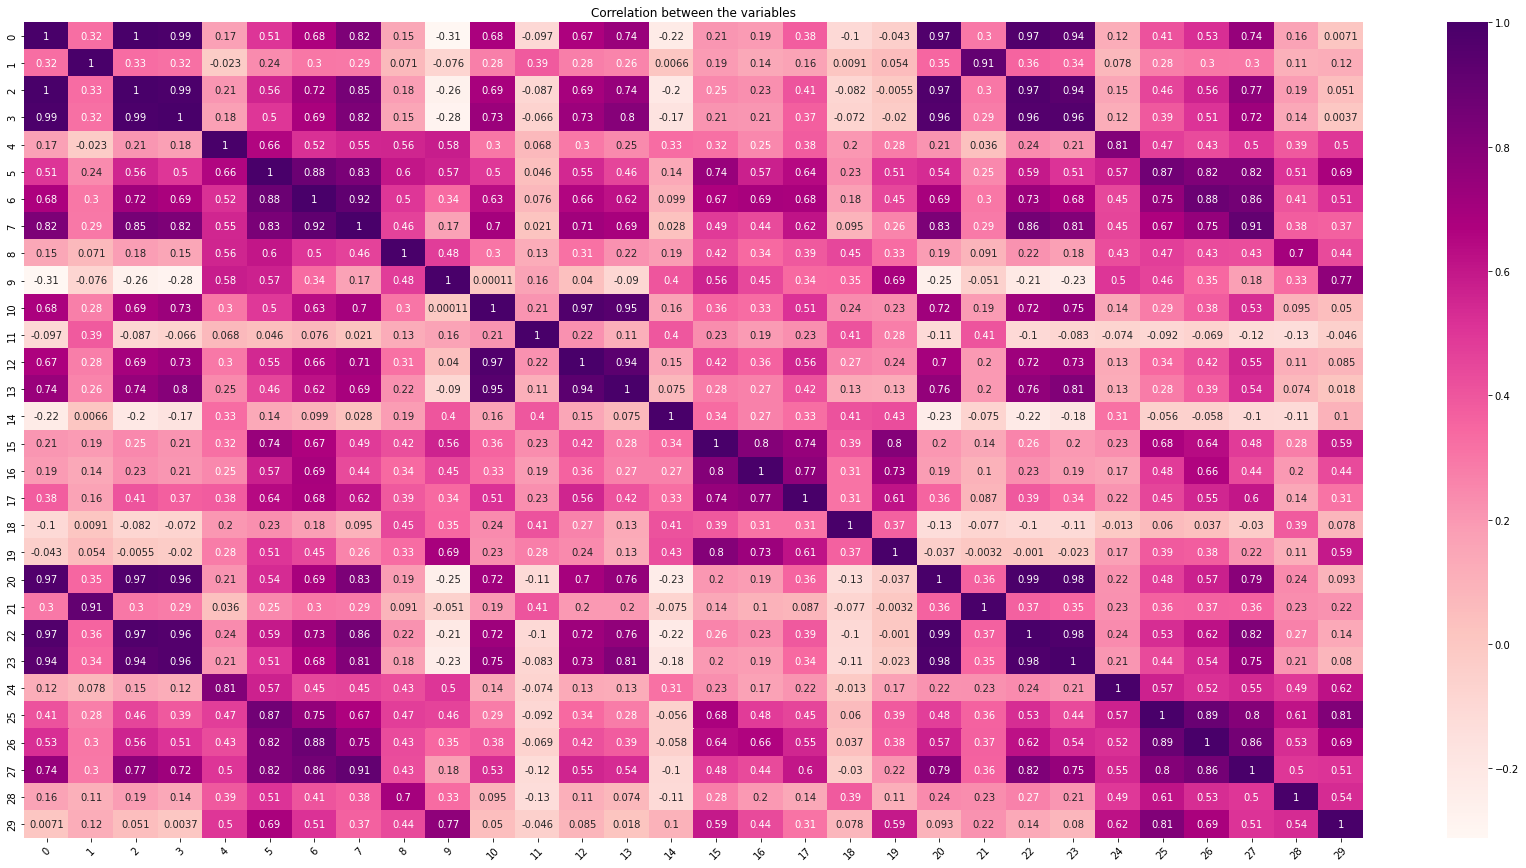

In [54]:
import seaborn as sns
plt.subplots(figsize=(30,15))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [55]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [57]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [58]:
print(grid_search.best_params_)

{'n_neighbors': 5}


In [59]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.67%


In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_test_hat=knn.predict(x_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 50.00%


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


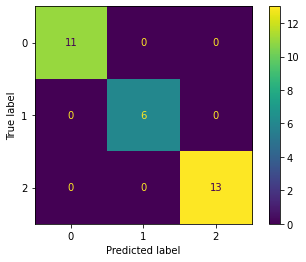

In [62]:
plot_confusion_matrix(grid,x_test, y_test)